# Crop Recommendation
Artificial Neural Network 

In [1]:
# Required Libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

## Dataset at a Glance

In [48]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Statistical View

In [49]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [50]:
df.shape

(2200, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [52]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [53]:
df["label"].value_counts()

lentil         100
cotton         100
papaya         100
pigeonpeas     100
mothbeans      100
maize          100
coconut        100
grapes         100
orange         100
apple          100
jute           100
coffee         100
watermelon     100
blackgram      100
kidneybeans    100
banana         100
chickpea       100
muskmelon      100
rice           100
pomegranate    100
mungbean       100
mango          100
Name: label, dtype: int64

In [56]:
df["label"].nunique()

22

## Data Visualization

<Figure size 1008x648 with 0 Axes>

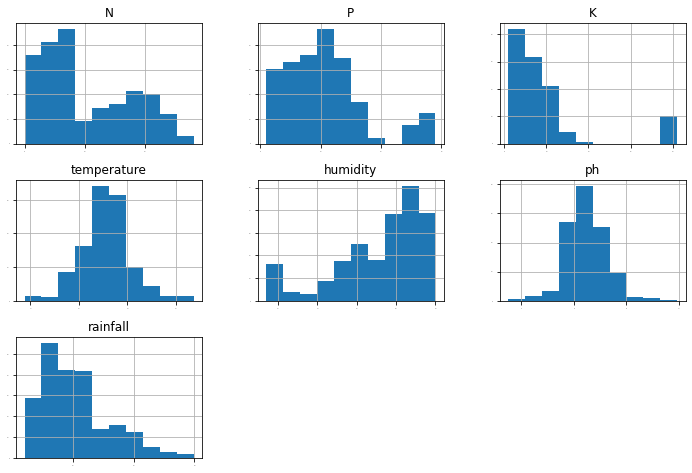

In [9]:
plt.figure(figsize=(14, 9))
df.hist(xlabelsize=1,ylabelsize=1,figsize=(12,8))
plt.show()

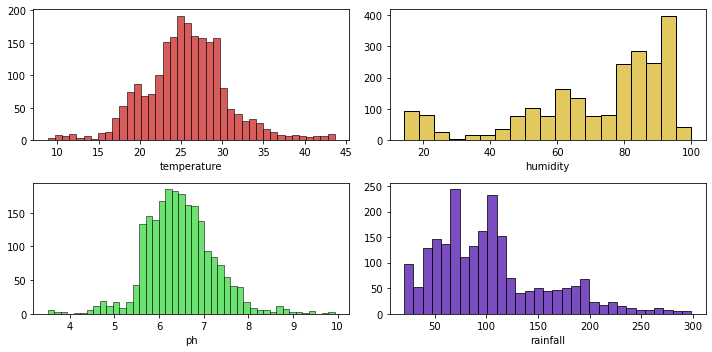

In [149]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(10,5)) 
sns.histplot(df['temperature'], ax=axs2[0,0], color='#cc2525')
sns.histplot(df['humidity'], ax=axs2[0,1], color='#d9b629')
sns.histplot(df['ph'], ax=axs2[1,0], color='#3bd940')
sns.histplot(df['rainfall'], ax=axs2[1,1], color='#4d13ab')
axs2[0,0].set_xlabel('temperature')
axs2[0,1].set_xlabel('humidity')
axs2[1,0].set_xlabel('ph')
axs2[1,1].set_xlabel('rainfall')
axs2[0,0].set_ylabel('')
axs2[0,1].set_ylabel('')
axs2[1,0].set_ylabel('')
axs2[1,1].set_ylabel('')
fig2.tight_layout()
plt.show()

<AxesSubplot:xlabel='N', ylabel='Count'>

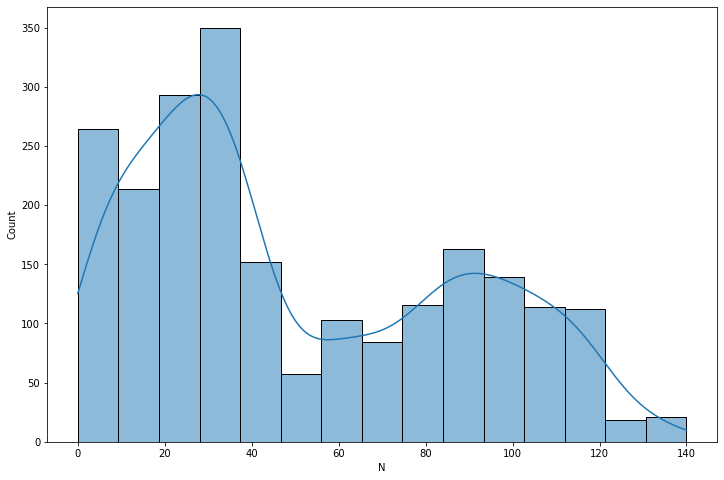

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.N, kde=True)

<AxesSubplot:xlabel='P', ylabel='Count'>

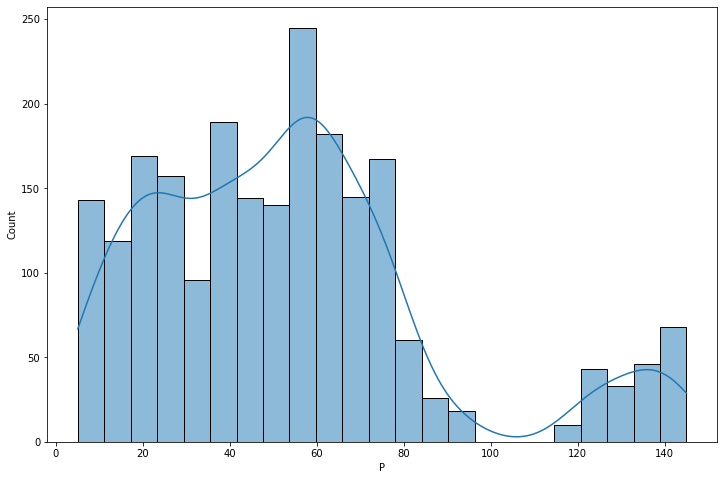

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.P, kde=True)

<AxesSubplot:xlabel='K', ylabel='Count'>

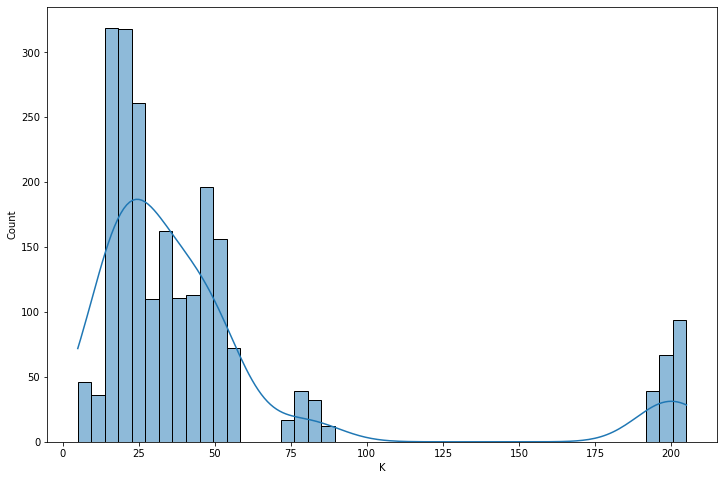

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.K, kde=True)

<AxesSubplot:xlabel='temperature', ylabel='Count'>

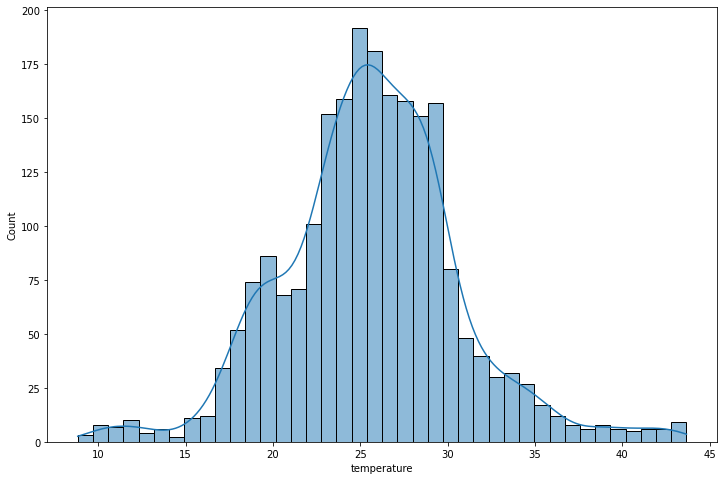

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.temperature, kde=True)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

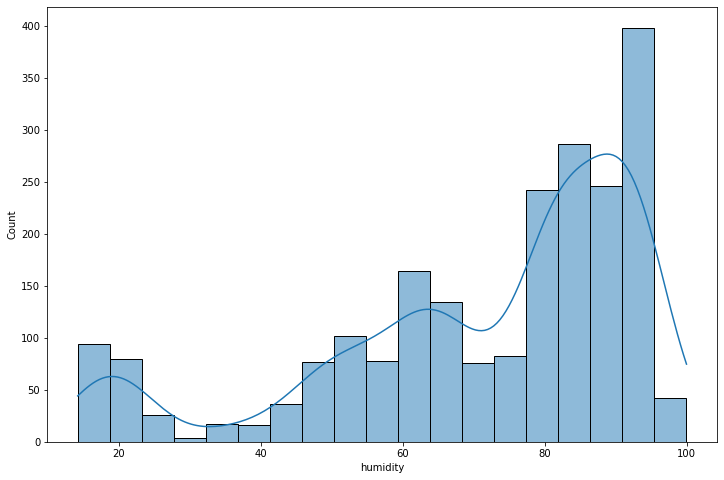

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.humidity, kde=True)

<AxesSubplot:xlabel='ph', ylabel='Count'>

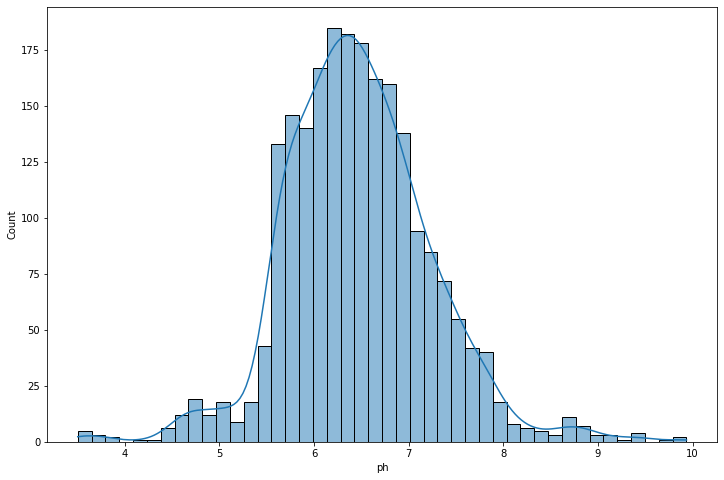

In [15]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.ph, kde=True)

<Figure size 864x576 with 0 Axes>

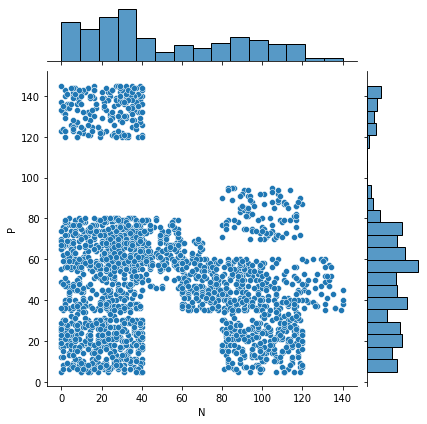

In [16]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.N, y = df.P, data = df)
plt.show()

<Figure size 864x576 with 0 Axes>

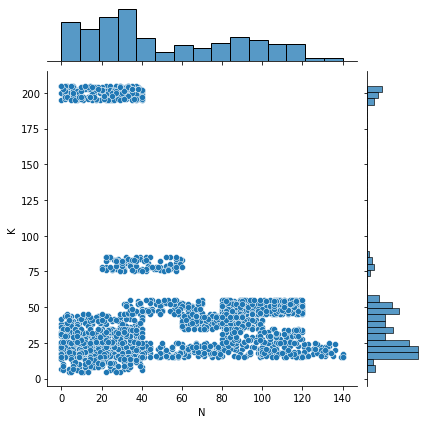

In [17]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.N, y = df.K, data = df)
plt.show()

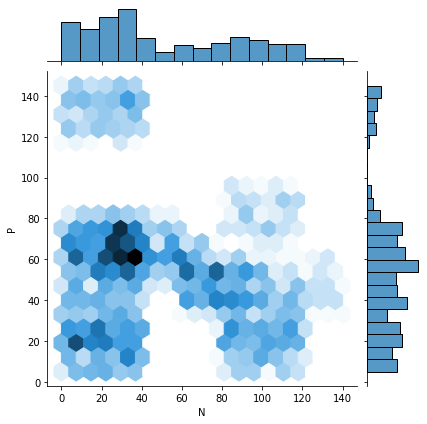

In [18]:
sns.jointplot(x = df.N, y = df.P, data = df, kind = 'hex')
plt.show()

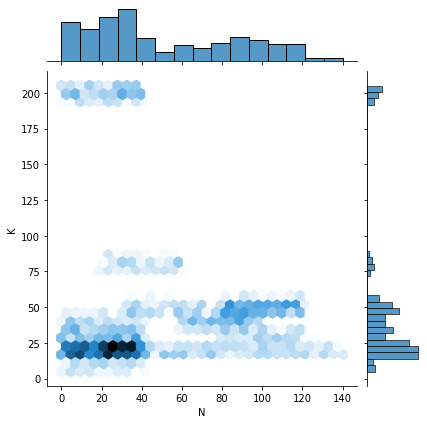

In [19]:
sns.jointplot(x = df.N, y = df.K, data = df, kind = 'hex')
plt.show()

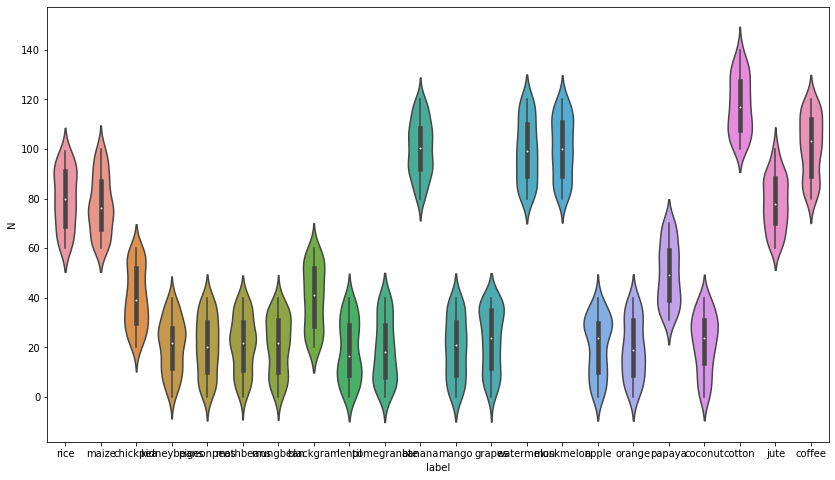

In [20]:
plt.figure(figsize=(14, 8))
sns.violinplot(x = "label", y = "N", data = df)
plt.show()

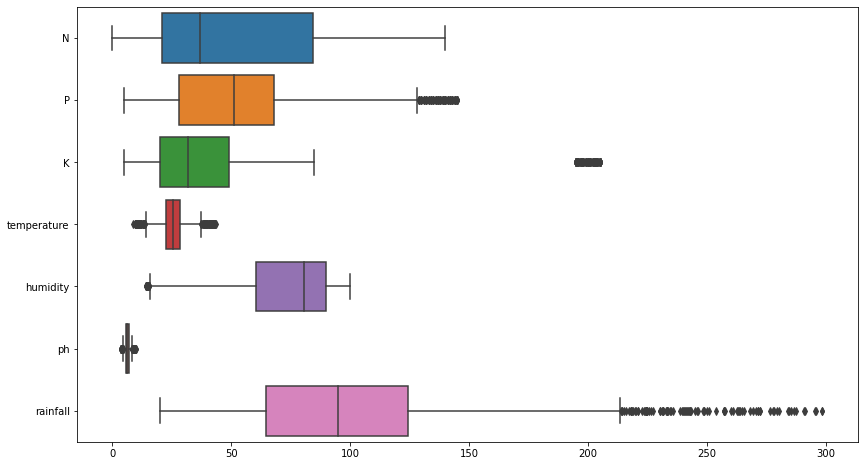

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(data = df, orient = "h")
plt.show()

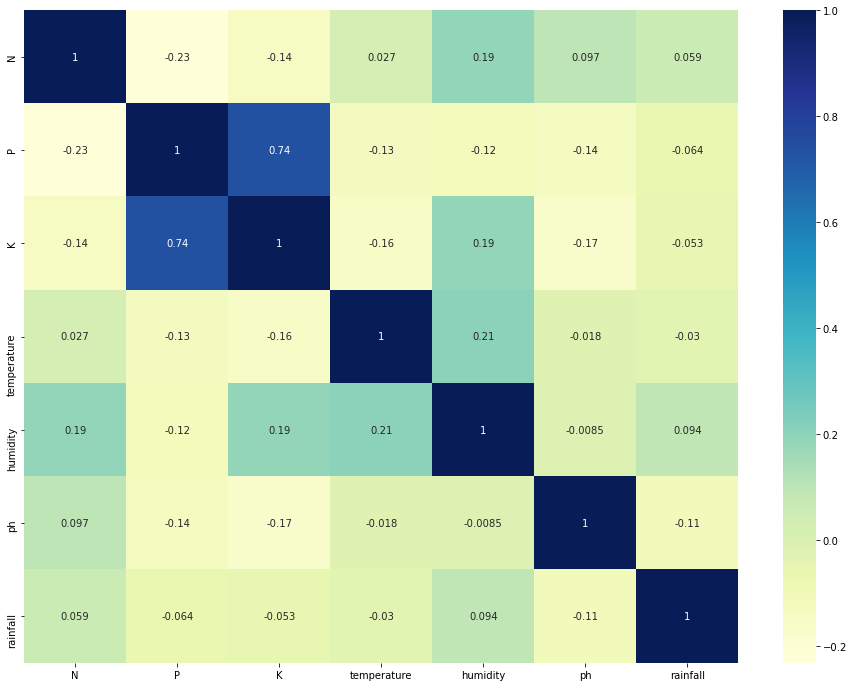

In [22]:
plt.figure(figsize=(16,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Data Processing

In [23]:
# label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# print(df["label"].value_counts())
df['label2']= label_encoder.fit_transform(df['label'])
print(df.head(10))

    N   P   K  temperature   humidity        ph    rainfall label  label2
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice      20
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice      20
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice      20
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice      20
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice      20
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice      20
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice      20
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice      20
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice      20
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice      20


In [24]:
maps = df[["label","label2"]].value_counts()
df.drop(columns='label', inplace=True)
maps

label        label2
apple        0         100
banana       1         100
rice         20        100
pomegranate  19        100
pigeonpeas   18        100
papaya       17        100
orange       16        100
muskmelon    15        100
mungbean     14        100
mothbeans    13        100
mango        12        100
maize        11        100
lentil       10        100
kidneybeans  9         100
jute         8         100
grapes       7         100
cotton       6         100
coffee       5         100
coconut      4         100
chickpea     3         100
blackgram    2         100
watermelon   21        100
dtype: int64

In [25]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label2
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


## Split dataset

In [26]:
x = df.drop(columns=['label2'])
y = df['label2']

## Feature Importance

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
 
rf.fit(x,y)
rf.feature_importances_

array([0.10342993, 0.14866186, 0.16930662, 0.07365682, 0.22141322,
       0.05894565, 0.2245859 ])

Text(0.5, 0, 'Random Forest Feature Importance')

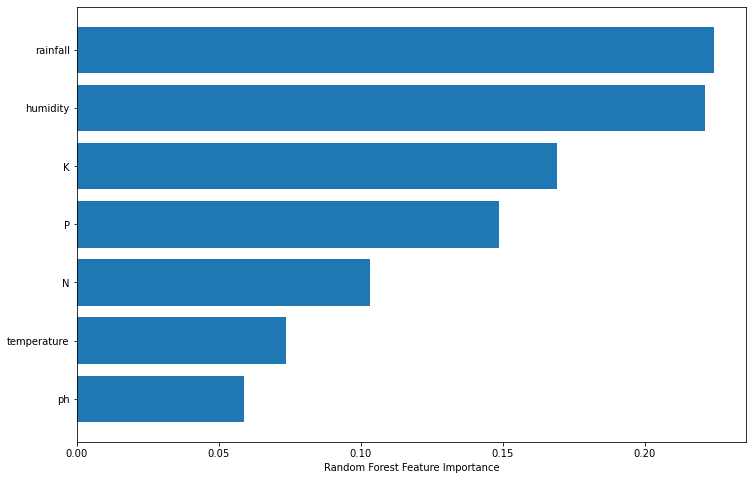

In [28]:
plt.figure(figsize=(12, 8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Data Normalization

In [29]:
x.std()

N              36.917334
P              32.985883
K              50.647931
temperature     5.063749
humidity       22.263812
ph              0.773938
rainfall       54.958389
dtype: float64

In [30]:
#Applying StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)
print(x_std.std())

1.0


## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

In [32]:
print("X_train Shape -", x_train.shape)
print("X_test Shape -", x_test.shape)
print("Y_train Shape -", y_train.shape)
print("Y_test Shape -", y_test.shape)

X_train Shape - (1540, 7)
X_test Shape - (660, 7)
Y_train Shape - (1540,)
Y_test Shape - (660,)


# Model

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [124]:
model = Sequential()

In [125]:
model.add(Dense(38, input_dim=7, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(22, activation='softmax'))

In [126]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 38)                304       
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1248      
_________________________________________________________________
dense_55 (Dense)             (None, 22)                726       
Total params: 2,278
Trainable params: 2,278
Non-trainable params: 0
_________________________________________________________________


In [128]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=32)

Epoch 1/100
44/44 [==============================] - 0s 3ms/step - loss: 2.9158 - accuracy: 0.1501 - val_loss: 2.7660 - val_accuracy: 0.2338
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 2.5000 - accuracy: 0.3261 - val_loss: 2.3082 - val_accuracy: 0.4091
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 2.0121 - accuracy: 0.4957 - val_loss: 1.7869 - val_accuracy: 0.5390
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 1.5099 - accuracy: 0.6616 - val_loss: 1.2856 - val_accuracy: 0.7143
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 1.0898 - accuracy: 0.7771 - val_loss: 0.9118 - val_accuracy: 0.8052
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 0.8039 - accuracy: 0.8355 - val_loss: 0.6839 - val_accuracy: 0.8636
Epoch 7/100
44/44 [==============================] - 0s 982us/step - loss: 0.6144 - accuracy: 0.8781 - val_loss: 0.5425 - val_accuracy: 0.8961
Epoch 8/100

Epoch 59/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9913 - val_loss: 0.0431 - val_accuracy: 0.9870
Epoch 60/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9913 - val_loss: 0.0381 - val_accuracy: 0.9870
Epoch 61/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9906 - val_loss: 0.0362 - val_accuracy: 0.9870
Epoch 62/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9921 - val_loss: 0.0389 - val_accuracy: 0.9870
Epoch 63/100
44/44 [==============================] - 0s 1000us/step - loss: 0.0346 - accuracy: 0.9913 - val_loss: 0.0380 - val_accuracy: 0.9870
Epoch 64/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9921 - val_loss: 0.0362 - val_accuracy: 0.9935
Epoch 65/100
44/44 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9928 - val_loss: 0.0385 - val_accuracy: 0.9935
Epo

# Model Evaluation

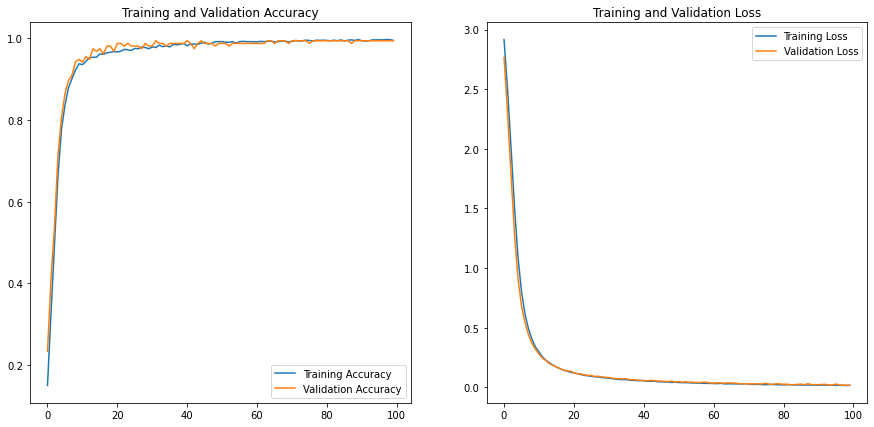

<Figure size 432x288 with 0 Axes>

In [130]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig("Accuracy.png")

In [131]:
scores = model.evaluate(x_test, y_test)

21/21 [==============================] - 0s 604us/step - loss: 0.0282 - accuracy: 0.9879


In [139]:
y_predict = model.predict(x_test)
y_predict[:2]

array([[1.50740149e-08, 1.41365994e-08, 2.29298268e-04, 7.09318021e-11,
        2.55534621e-10, 5.31867406e-17, 6.97699329e-11, 1.26932673e-06,
        1.77196824e-07, 6.93930048e-15, 5.04233940e-05, 8.68625519e-11,
        5.88175342e-11, 7.05564496e-10, 9.95283306e-01, 5.03282195e-07,
        3.49985203e-04, 4.04024171e-03, 8.86062601e-09, 4.47387829e-05,
        1.08098185e-19, 1.34556268e-08],
       [3.89151255e-12, 2.56855060e-07, 9.99410152e-01, 4.75425992e-08,
        5.62193882e-18, 1.03899766e-12, 3.96147698e-11, 1.03614859e-07,
        2.15749779e-07, 1.02358934e-10, 5.79125946e-04, 4.54450344e-07,
        1.14777849e-11, 3.78042131e-07, 6.62130424e-06, 9.32726394e-08,
        7.90391027e-07, 3.07102340e-07, 1.37080667e-06, 1.74124875e-12,
        7.56015745e-25, 3.55683213e-12]], dtype=float32)

In [141]:
model.save('crop_ann_model.h5')

In [142]:
from tensorflow import keras
model = keras.models.load_model('crop_ann_model.h5')

In [145]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 38)                304       
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1248      
_________________________________________________________________
dense_55 (Dense)             (None, 22)                726       
Total params: 2,278
Trainable params: 2,278
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.predict(x_test[:1])

array([[1.50740149e-08, 1.41365994e-08, 2.29298268e-04, 7.09320727e-11,
        2.55534177e-10, 5.31867406e-17, 6.97697941e-11, 1.26932423e-06,
        1.77196824e-07, 6.93932716e-15, 5.04233940e-05, 8.68623853e-11,
        5.88175342e-11, 7.05564496e-10, 9.95283306e-01, 5.03281740e-07,
        3.49984388e-04, 4.04023565e-03, 8.86062601e-09, 4.47388229e-05,
        1.08097772e-19, 1.34556268e-08]], dtype=float32)

In [155]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [156]:
class_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

# Result

In [181]:
result = "------ Recommended Crop is {} with a {:.2f}% Confidance. ".format(class_names[np.argmax(y_predict[1:2])],
                                         100 * np.max(y_predict[1:2]))
print(result)

------ Recommended Crop is chickpea with a 99.94% Confidance. 
